In [1]:
# Import Standard Packages
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
import sys

In [2]:
%load_ext autoreload
%autoreload 2
# Find Paths for and Import NeuroPy and Eraser
neuropy_path = Path('/home/kimqi/Documents/Repositories/NeuroPy')
eraser_path = Path('/home/kimqi/Documents/Repositories/Eraser')
sys.path.append(str(neuropy_path))
sys.path.append(str(eraser_path))

# Import NeuroPy Packages
from neuropy.utils.ccg import correlograms
from neuropy.utils.mathutil import contiguous_regions
from neuropy.io.openephysio import get_dat_timestamps
from neuropy.plotting import Fig
from neuropy.io.binarysignalio import BinarysignalIO
from neuropy.plotting.signals import plot_signal_traces
from neuropy.utils.signal_process import filter_sig
from neuropy.analyses import oscillations
from neuropy.plotting import spikes


# Import Eraser Packages
from Ephys.ephys import *

In [3]:
# Set Data and Figure Directories
fig_save_dir = Path('/home/kimqi/Documents/Code/Pencil/Plots')
working_dir = Path('/media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff')

# Set working_dir in ephys module.
set_working_dir(working_dir)

# Check so functions that depend on working_dir will still work
check_for_working_dir()

Working Directory set as: /media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff


In [4]:
FigS7 = Fig(4, 5, num="Figure S7", size=(7, 3), fontsize=6)
print(FigS7.fig.get_size_inches())

[7. 3.]


<Figure size 700x300 with 0 Axes>

In [5]:
saline1_folder = '2024_07_15_Saline1'
ani_folder = '2024_07_17_Anisomycin'
saline2_folder = '2024_07_18_Saline2'


folder_list = [saline1_folder, ani_folder, saline2_folder]
unit_type = ['single', 'single', 'single']
session = ['saline1', 'ANI', 'saline2']

In [6]:
saline2_timestamps = get_dat_timestamps(working_dir / saline2_folder)

start time = 2024-07-18 10:44:06-04:00
start time = 2024-07-18 10:56:53-04:00
start time = 2024-07-18 11:16:12-04:00
start time = 2024-07-18 11:45:02-04:00
start time = 2024-07-18 12:11:35-04:00
start time = 2024-07-18 12:23:21-04:00
start time = 2024-07-18 12:26:48-04:00
start time = 2024-07-18 12:58:21-04:00
start time = 2024-07-18 13:11:19-04:00
start time = 2024-07-18 13:41:56-04:00
start time = 2024-07-18 14:02:49-04:00
start time = 2024-07-18 14:31:14-04:00
start time = 2024-07-18 14:53:21-04:00
start time = 2024-07-18 14:58:30-04:00


In [7]:
load_events_csv(saline2_folder, saline2_timestamps.iloc[0], working_dir=working_dir)

,start,stop,label
0,2024-07-18 10:44:00,2024-07-18 11:14:50,Pre
1,2024-07-18 11:15:00,2024-07-18 11:15:10,Injection
2,2024-07-18 11:16:00,2024-07-18 12:25:00,Post
3,2024-07-18 12:26:00,2024-07-18 12:57:50,Track 1
4,2024-07-18 12:58:00,2024-07-18 14:30:50,Post 2
5,2024-07-18 14:31:00,2024-07-18 14:58:32,Track 2


In [8]:
corr_by_epoch_saline2, time_bins_saline2, epochs_used_saline2 = calc_ccg_by_epoch(saline2_folder, timestamps=saline2_timestamps, working_dir=working_dir)

Calculating CCGs for epoch Pre
Calculating CCGs for epoch Injection
Calculating CCGs for epoch Post
Calculating CCGs for epoch Track 1
Calculating CCGs for epoch Post 2
Calculating CCGs for epoch Track 2


In [9]:
#plot_ccg_by_epoch(corr_by_epoch_saline2[:, 10, 10, :].reshape((corr_by_epoch_saline2.shape[0], 1, 1, corr_by_epoch_saline2.shape[3])), time_bins_saline2, epochs_used_saline2, 'Saline2 Combined')
#plt.gcf().set_size_inches((11, 1.75))

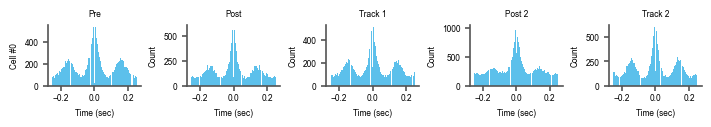

In [10]:
ax_saline2 = []
for i in range(5):
    ax_saline2.append(FigS7.subplot(FigS7.gs[0, i]))
ax_saline2 = np.array(ax_saline2)[None, :]
plot_ccg_by_epoch(corr_by_epoch_saline2[:, 10, 10, :].reshape((corr_by_epoch_saline2.shape[0], 1, 1, corr_by_epoch_saline2.shape[3])), time_bins_saline2, epochs_used_saline2, 'Saline2 combined',
                                    ax=ax_saline2)

FigS7.fig

### Import eeg file and get raw theta and SWR traces

In [11]:
sorted((working_dir / saline2_folder).glob("*.eeg"))[0]

PosixPath('/media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff/2024_07_18_Saline2/Creampuff_Saline2.eeg')

In [12]:
saline2_signal = BinarysignalIO(sorted((working_dir / saline2_folder).glob("*.eeg"))[0], n_channels=35, sampling_rate=1250)
print(saline2_signal)

duration: 15363.86 seconds 
duration: 4.27 hours 



In [13]:
saline2_epochs = load_events_csv(saline2_folder, start_time=saline2_timestamps.iloc[0], working_dir=working_dir)
saline2_epochs

,start,stop,label
0,2024-07-18 10:44:00,2024-07-18 11:14:50,Pre
1,2024-07-18 11:15:00,2024-07-18 11:15:10,Injection
2,2024-07-18 11:16:00,2024-07-18 12:25:00,Post
3,2024-07-18 12:26:00,2024-07-18 12:57:50,Track 1
4,2024-07-18 12:58:00,2024-07-18 14:30:50,Post 2
5,2024-07-18 14:31:00,2024-07-18 14:58:32,Track 2


Pre
t_start:  [0.]
t_stop:  [1719.7056]


(-2.044117647058824, 2.3558823529411765)

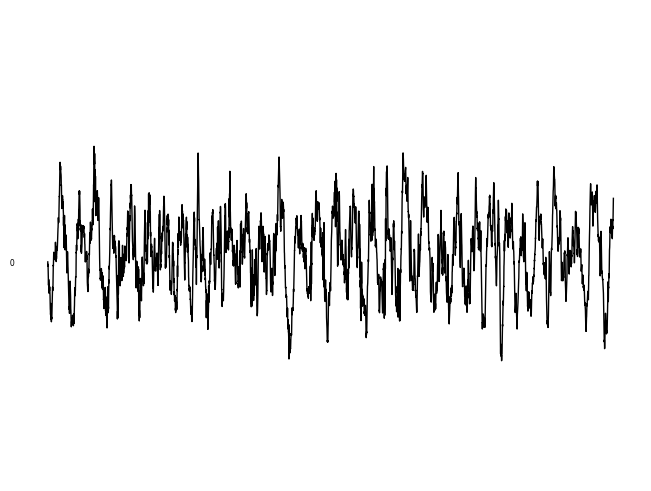

In [14]:
def get_epoch_signal(signal, epoch, epochs_df, channel_indx=None, SR=30000):
    SR = 30000
    epochs = epochs_df

    print(epoch)
    ts = saline2_timestamps.squeeze()
    epoch_use = epochs[epochs['label'] == epoch]
    start_sec = ts.searchsorted(epoch_use['start'].dt.tz_localize(ts.iloc[0].tz))/SR
    print('t_start: ', start_sec)
    stop_sec = ts.searchsorted(epoch_use['stop'].dt.tz_localize(ts.iloc[0].tz))/SR
    print('t_stop: ', stop_sec)
    # start_sec = ts.searchsorted(epoch_use['start'])/SR
    # stop_sec = ts.searchsorted(epoch_use['stop'])/SR

    return signal.get_signal(channel_indx=channel_indx, t_start=start_sec, t_stop=stop_sec)

# Make sure it is working well by plotting
pre_theta = get_epoch_signal(saline2_signal, 'Pre', saline2_epochs, channel_indx=4)
ax = plot_signal_traces(pre_theta.time_slice(t_start=750, t_stop=755))
ax.set_ylim(np.array(ax.get_ylim())*2)

In [15]:
ax_theta = FigS7.subplot2grid(FigS7.gs[1:, 0:2], grid=(3, 1), return_axes=True)

### TODO: set ylim to be all the same
track_theta = get_epoch_signal(saline2_signal, 'Track 1', saline2_epochs, channel_indx=4)
post_theta = get_epoch_signal(saline2_signal, 'Post', saline2_epochs, channel_indx=4)
post_hp = filter_sig.highpass(post_theta, cutoff=2)  # highpass filter to get rid of floating ground issue in homecage
track2_theta = get_epoch_signal(saline2_signal, 'Track 2', saline2_epochs, channel_indx=4)

Track 1
t_start:  [5673.07786667]
t_stop:  [7566.41386667]
Post
t_start:  [1719.7056]
t_stop:  [5613.07786667]
Track 2
t_start:  [12920.75026667]
t_stop:  [14426.64786667]


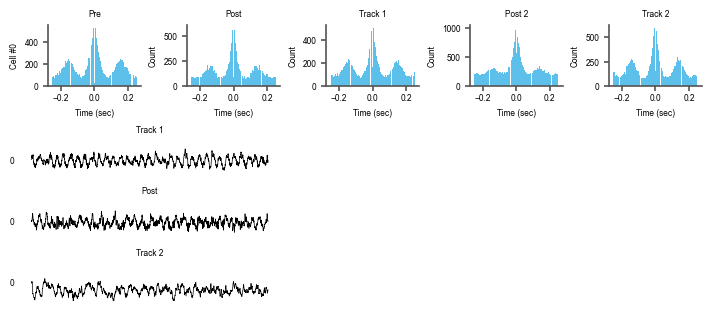

In [16]:
# Track 10 min post Saline2
plot_signal_traces(track_theta.time_slice(t_start=5805, t_stop=5810), ax=ax_theta[0], lw=0.5)
ax_theta[0].set_title('Track 1')

# Post 30 min post Saline2
plot_signal_traces(post_theta.time_slice(t_start=1722, t_stop=1727), ax=ax_theta[1], lw=0.5)
ax_theta[1].set_title('Post')
ax_theta[1].sharey(ax_theta[0])

# Track 2 post Saline 2
plot_signal_traces(track2_theta.time_slice(t_start= 12992, t_stop=12997), ax=ax_theta[2], lw=0.5)
ax_theta[2].set_title('Track 2')
ax_theta[2].sharey(ax_theta[0])

ax_theta[2].set_ylim(np.array(ax_theta[2].get_ylim())*1.6)
FigS7.fig


In [17]:
from neuropy.core.session import ProcessData

basepath = '/media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff/2024_07_18_Saline2'
sess = ProcessData(basepath)

In [18]:
from neuropy.io.phyio import PhyIO
from neuropy.core.neurons import Neurons
phy_dir = sorted(sess.basepath.glob("**/params.py"))[0].parent
sess.phy = PhyIO(dirname=phy_dir)

sess.neurons = Neurons(sess.phy.spiketrains, t_stop=sess.eegfile.duration, neuron_ids=sess.phy.neuron_ids,
                       neuron_type=sess.phy.cluster_info["group"], waveforms=sess.phy.waveforms, 
                       waveforms_amplitude=sess.phy.waveforms_amplitude, sampling_rate=sess.recinfo.dat_sampling_rate,
                       peak_channels=sess.phy.peak_channels, shank_ids=sess.phy.shank_ids)

# 
for sh in np.unique(sess.neurons.shank_ids.astype(int)):
    sess.recinfo.write_neurons(sess.neurons.neuron_slice(np.where(sess.neurons.shank_ids == sh)[0]), suffix_num=sh)

id column does not exist in cluster_info.tsv. Using cluster_id column instead.


In [19]:
sess.neurons

Neurons
 n_neurons: 12
 t_start: 0.0
 t_stop: 15363.8608
 neuron_type: ['good']

# Get Spikes/Probe Group, Not Necessary after running once

In [20]:
from neuropy.analyses.spkepochs import detect_pbe_epochs
bin_size=0.01
thresh = (2.5, None)
edge_cutoff = 0.5
duration = (0.1, None)
distance = None

# Collect MUA
sess.mua = sess.neurons.get_mua(bin_size=bin_size)

In [21]:
# Detect PBEs
sess.pbe = detect_pbe_epochs(sess.mua, thresh=thresh, edge_cutoff=edge_cutoff, duration=duration, distance=distance)
pbe_epochs_file = sess.filePrefix.with_suffix(".pbe_epochs.npy")
sess.pbe.save(pbe_epochs_file)
sess.recinfo.write_epochs(sess.pbe, ext='pbe')

2111 epochs reamining with durations within (0.1,None)
/media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff/2024_07_18_Saline2/Creampuff_Saline2.pbe_epochs.npy saved


In [22]:
from neuropy.core.session import ProcessData
import os

def sess_use(basepath=os.getcwd()):
    return ProcessData(basepath)

sess = sess_use('/media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff/2024_07_18_Saline2')
print(sess.recinfo)

signal = sess.eegfile.get_signal()

filename: /media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff/2024_07_18_Saline2/Creampuff_Saline2.xml 
# channels: 35
sampling rate: 30000
lfp Srate (downsampled): 1250



/media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff/2024_07_18_Saline2/Creampuff_Saline2.probegroup.npy saved


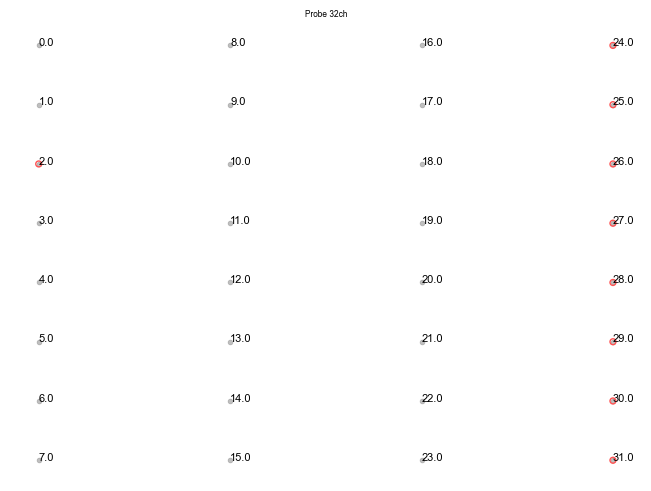

In [23]:
from neuropy.core import Shank, Probe, ProbeGroup
from neuropy.plotting import plot_probe
shank = Shank()
shank = shank.auto_generate(columns=4, contacts_per_column=8, xpitch=125,
                   ypitch=-20, channel_id=np.arange(0, 32, 1))
shank.set_disconnected_channels(sess.recinfo.skipped_channels)
probe = Probe(shank)
prbgrp = ProbeGroup()
prbgrp.add_probe(probe)
plot_probe(prbgrp)
prbgrp.filename = sess.filePrefix.with_suffix(".probegroup.npy")
prbgrp.save(prbgrp.filename)
sess.prbgrp = prbgrp

In [25]:
art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
art_epochs = Epoch(epochs=None, file=art_epochs_file)

In [25]:
# Detect Ripple Epochs
ripple_epochs = oscillations.detect_ripple_epochs(signal, sess.prbgrp, thresh=(2.5,5), ignore_epochs=art_epochs, ripple_channel=17)

Selected channels for ripples: [17]
716 epochs remaining with durations within (0.05,0.45)


In [26]:
ripple_epochs_file = sess.filePrefix.with_suffix(".ripple_epochs.npy")
sess.recinfo.write_epochs(epochs=ripple_epochs, ext='swr')
ripple_epochs.save(ripple_epochs_file)

/media/kimqi/BK/Data/Anisomycin/Recording_Rats/Creampuff/2024_07_18_Saline2/Creampuff_Saline2.ripple_epochs.npy saved


## Now grab some ripples

Track 1
t_start:  [5704.41386667]
t_stop:  [7579.04213333]


[]

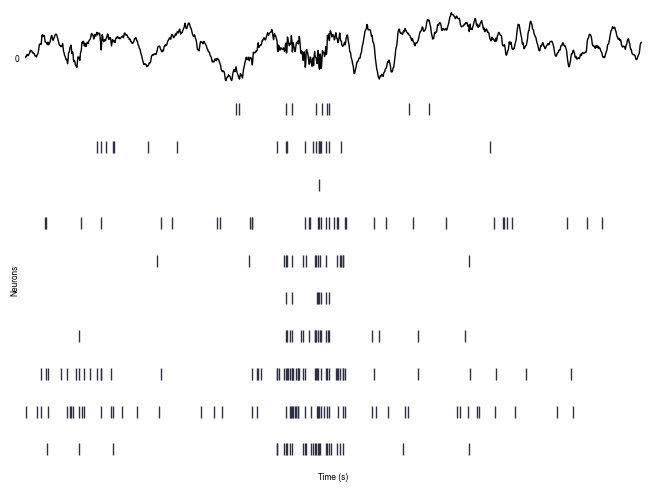

In [31]:
fig, ax = plt.subplots(2, 1, height_ratios=[1, 5], sharex=True)

swr_track = get_epoch_signal(saline2_signal, 'Track 1', saline2_epochs, channel_indx=[16])
swr_ax = plot_signal_traces(swr_track.time_slice(t_start=6028.26, t_stop=6029.26), ax=ax[0])

spikes.plot_raster(sess.neurons.time_slice(t_start=6028.26, t_stop=6029.26), ax=ax[1], markersize=8)
sns.despine(ax=ax[1], bottom=True, left=True)
ax[1].set_xticks([])

ax[1].set_yticks([])

Track 1
t_start:  [5704.41386667]
t_stop:  [7579.04213333]
Post
t_start:  [1719.7056]
t_stop:  [5704.41386667]
Track 2
t_start:  [12920.75026667]
t_stop:  [15363.86066667]


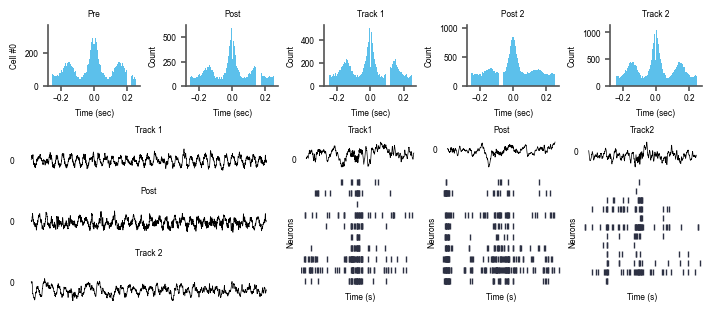

In [20]:
# Get Signals for various epochs to look for ripples
swr_track = get_epoch_signal(saline2_signal, 'Track 1', saline2_epochs, channel_indx=[16])
swr_post = get_epoch_signal(saline2_signal, 'Post', saline2_epochs, channel_indx=[16])
swr_track2 = get_epoch_signal(saline2_signal, 'Track 2', saline2_epochs, channel_indx=[16])

ax_swr = FigS7.subplot2grid(FigS7.gs[1:, 2:], height_ratios=[1, 4], grid=(2, 3), return_axes=True)

# Plot Track 1 LFP and Spikes
plot_signal_traces(swr_track.time_slice(t_start=6028.26, t_stop=6029.26), ax=ax_swr[0,0], lw=0.5)
spikes.plot_raster(sess.neurons.time_slice(t_start=6028.26, t_stop=6029.26), ax=ax_swr[1,0], markersize=4)
sns.despine(ax=ax_swr[1,0], bottom=True, left=True)
ax_swr[1,0].set_xticks([])
ax_swr[1,0].set_yticks([])
ax_swr[0,0].set_title('Track1')

# Plot Post LFP and Spikes
plot_signal_traces(swr_post.time_slice(t_start=2126.12, t_stop=2127.12), ax=ax_swr[0,1], lw=0.5)
spikes.plot_raster(sess.neurons.time_slice(t_start=2126.12, t_stop=2127.12), ax=ax_swr[1,1], markersize=4)
sns.despine(ax=ax_swr[1,1], bottom=True, left=True)
ax_swr[1,1].set_xticks([])
ax_swr[1,1].set_yticks([])
ax_swr[0,1].set_title('Post')

# Plot Track 2 LFP and Spikes
# Plot Post LFP and Spikes
plot_signal_traces(swr_track2.time_slice(t_start=12973.98, t_stop=12974.98), ax=ax_swr[0,2], lw=0.5)
spikes.plot_raster(sess.neurons.time_slice(t_start=12973.98, t_stop=12974.98), ax=ax_swr[1,2], markersize=4)
sns.despine(ax=ax_swr[1,2], bottom=True, left=True)
ax_swr[1,2].set_xticks([])
ax_swr[1,2].set_yticks([])
ax_swr[0,2].set_title('Track2')


FigS7.fig

In [21]:
FigS7.savefig(fig_save_dir / 'Figure S7.pdf')

In [22]:
fig_save_dir

PosixPath('/home/kimqi/Documents/Code/Pencil/Plots')